In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Copy of Sheet2.csv_(2)(1).csv')


In [37]:
df['Period'] = df['Year'].apply(lambda x: 'Pre-COVID' if x <= 2021 else 'Post-COVID')
#This line creates a new column called “Period” by applying a condition to each value 
#in the Year column using a lambda function, labeling years ≤ 2021 as “Before 2022” and years > 2021 as “2022 Onwards”.
#For each year, check if it is 2021 or earlier — if yes, mark as Pre period; otherwise mark as Post period.


In [38]:
df['Net_Profit_Cr'] = (
    df['Net_Profit_Cr']
    .astype(str)
    .str.replace(',', '')
    .astype(float)
)

In [39]:
df_sorted = df.sort_values(by=['Company Name', 'Year'])

df_sorted['Net_Profit_Growth_%'] = (
    df_sorted.groupby('Company Name')['Net_Profit_Cr']
    .pct_change() * 100
)


In [40]:
df_sorted = df_sorted[df_sorted['Net_Profit_Growth_%'].between(-200, 200)]

avg_growth = df_sorted.groupby('Year')['Net_Profit_Growth_%'].mean().reset_index()

<Axes: xlabel='Year', ylabel='Net_Profit_Growth_%'>

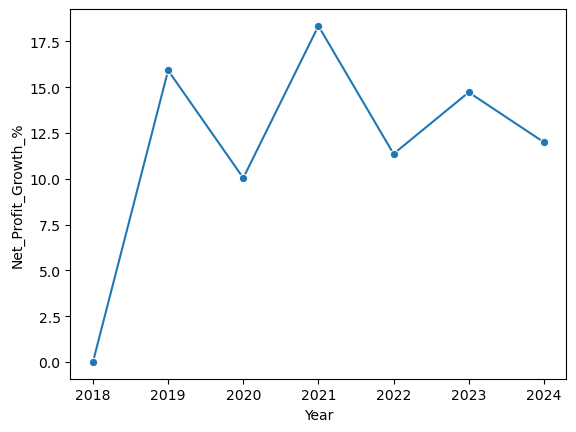

In [41]:
sns.lineplot(data=avg_growth, x='Year', y='Net_Profit_Growth_%', marker='o')

In [42]:
df['DebttoEquity'] = pd.to_numeric(df['DebttoEquity'], errors='coerce')

In [43]:
df_sorted = df.sort_values(by=['Company Name', 'Year'])
df_sorted['Net_Profit_Growth_%'] = df_sorted.groupby('Company Name')['Net_Profit_Cr'].pct_change() * 100
df_sorted['DE_Growth_%'] = df_sorted.groupby('Company Name')['DebttoEquity'].pct_change() * 100

print(df_sorted[['Company Name', 'Year', 'Net_Profit_Cr', 'DebttoEquity', 'Net_Profit_Growth_%', 'DE_Growth_%']])


                        Company Name  Year  Net_Profit_Cr  DebttoEquity  \
237  Aditya Birla Fashion and Retail  2018          200.0          1.80   
236  Aditya Birla Fashion and Retail  2019          250.0          1.70   
235  Aditya Birla Fashion and Retail  2020          300.0          1.60   
234  Aditya Birla Fashion and Retail  2021          350.0          1.50   
233  Aditya Birla Fashion and Retail  2022          400.0          1.40   
..                               ...   ...            ...           ...   
23                        Wipro Ltd.  2020        10795.0          0.08   
24                        Wipro Ltd.  2021        12219.0          0.14   
25                        Wipro Ltd.  2022        11350.0          0.13   
26                        Wipro Ltd.  2023        11350.0          0.13   
27                        Wipro Ltd.  2024        11035.0          0.13   

     Net_Profit_Growth_%  DE_Growth_%  
237                  NaN          NaN  
236            25.0

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the uploaded file — adjust file name if different
df = pd.read_csv('Copy of Sheet2.csv_(2)(1).csv')

# Clean column names if necessary (e.g., remove extra spaces)
df.columns = df.columns.str.strip()
df['Net_Profit_Cr'] = df['Net_Profit_Cr'].str.replace(',', '', regex=False).astype(float)

# 👇 Use this to label time periods more clearly
df['Period'] = df['Year'].apply(lambda x: 'Before 2022' if x <= 2021 else '2022 Onwards')
# Or this:
# df['Period'] = df['Year'].apply(lambda x: 'Pre-Reform' if x <= 2021 else 'Post-Reform')


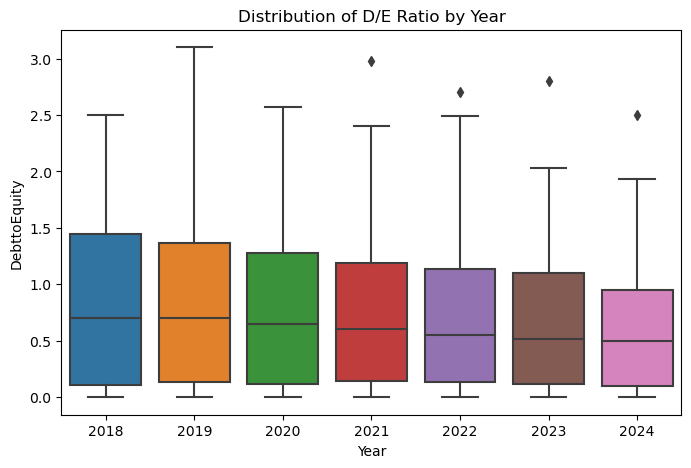

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Year', y='DebttoEquity')
plt.title('Distribution of D/E Ratio by Year')
plt.show()

In [49]:
df_sorted.groupby('Company Name')['DebttoEquity'].agg(['first', 'last'])


,first,last
Company Name,,
Aditya Birla Fashion and Retail,1.80,1.2000
Ashok Leyland,1.10,0.5000
Aurobindo Pharma,0.26,0.1400
Axis Bank,1.60,0.9500
Bajaj Auto,0.03,0.0300
Bajaj Finserv,1.70,2.5000
Bandhan Bank,1.25,0.7600
Bharat Petroleum,0.98,0.8500
Bharti Airtel Ltd,1.80,1.5000


In [53]:
de_change_summary = df_sorted.groupby('Company Name')['DebttoEquity'].agg(['first', 'last'])


In [54]:
de_change_summary['Absolute_Change'] = (
    de_change_summary['last'] - de_change_summary['first']
)

In [56]:
(de_change_summary['Absolute_Change'] < 0).mean()

0.6326530612244898

<Axes: xlabel='DE_Change', ylabel='Profit_Pct_Change'>

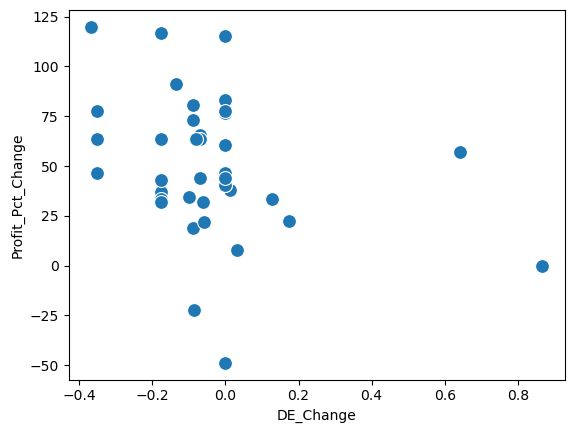

In [63]:
df_summary_filtered = df_summary[
    df_summary['Profit_Pct_Change'].between(-200, 200)
]

sns.scatterplot(
    data=df_summary_filtered,
    x='DE_Change',
    y='Profit_Pct_Change',
    s=100
)

In [64]:
df_summary_filtered[['DE_Change', 'Profit_Pct_Change']].corr()

,DE_Change,Profit_Pct_Change
DE_Change,1.000000,-0.459103
Profit_Pct_Change,-0.459103,1.000000


In [66]:
df_summary = pd.DataFrame(summary)

In [67]:
df_summary_filtered = df_summary[
    df_summary['Profit_Pct_Change'].between(-200, 200)
]


In [68]:
q1 = df_summary_filtered[(df_summary_filtered['DE_Change'] > 0) & (df_summary_filtered['Profit_Pct_Change'] > 0)]
q2 = df_summary_filtered[(df_summary_filtered['DE_Change'] < 0) & (df_summary_filtered['Profit_Pct_Change'] > 0)]
q3 = df_summary_filtered[(df_summary_filtered['DE_Change'] < 0) & (df_summary_filtered['Profit_Pct_Change'] < 0)]
q4 = df_summary_filtered[(df_summary_filtered['DE_Change'] > 0) & (df_summary_filtered['Profit_Pct_Change'] < 0)]

correlation = df_summary_filtered['DE_Change'].corr(df_summary_filtered['Profit_Pct_Change'])

print("Companies with:")
print(f"- Improved profit & increased D/E (Q1): {len(q1)}")
print(f"- Improved profit & reduced D/E (Q2): {len(q2)}")
print(f"- Lower profit & reduced D/E (Q3): {len(q3)}")
print(f"- Lower profit & increased D/E (Q4): {len(q4)}")
print(f"\nCorrelation between D/E change and profit change: {round(correlation, 2)}")

Companies with:
- Improved profit & increased D/E (Q1): 14
- Improved profit & reduced D/E (Q2): 26
- Lower profit & reduced D/E (Q3): 1
- Lower profit & increased D/E (Q4): 1

Correlation between D/E change and profit change: -0.46


In [70]:
df_summary = pd.DataFrame(summary)

In [71]:
df_summary_filtered = df_summary[
    df_summary['Profit_Pct_Change'].between(-200, 200)
]

In [72]:
import statsmodels.api as sm

# Independent and dependent variables
X = df_summary_filtered['DE_Change']
y = df_summary_filtered['Profit_Pct_Change']

# Add constant (intercept)
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Profit_Pct_Change   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     11.22
Date:                Mon, 23 Feb 2026   Prob (F-statistic):            0.00172
Time:                        00:35:10   Log-Likelihood:                -217.89
No. Observations:                  44   AIC:                             439.8
Df Residuals:                      42   BIC:                             443.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.1171      5.529      9.065      0.0